In [3]:
from RandomDataGenerator import Polynomial_Data_Generator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# import importlib
# import RandomDataGenerator
# importlib.reload(RandomDataGenerator)

<module 'RandomDataGenerator' from '/Users/jolene/Documents/NYCU/Machine Learning/HW3/RandomDataGenerator.py'>

## 1. b=1, n=4, a=1, w=[1, 2, 3, 4]

In [4]:
import math
class BayesianLinearRegression:
    def __init__(self, b, n, a, w, max_iter=500):
        self.b = b
        self.n = n
        self.a = a
        self.w = w
        self.max_iter = max_iter
        self.mu = np.zeros((n, 1))
        self.var = np.identity(n) / b
        self.point_x = []
        self.point_y = []
        self.visual_x = []
        self.visual_y = []
        
    def fit(self):
        i = 0
        while i < self.max_iter:
            x, y = Polynomial_Data_Generator(self.n, self.a, self.w)
            print(f'Add data point ({x}, {y}):\n')
            
            X = np.asarray([x ** j for j in range(self.n)]).reshape(-1, 1)
            y = np.array([[y]])
            S = np.linalg.pinv(self.var)
            
            estimate_var = np.linalg.pinv(1/self.a * (X @ X.T) + S)
            estimate_mu = estimate_var @ (1/self.a * X * y + S @ self.mu)
            print(f'Postirior mean:\n {estimate_mu}\nPosterior variance:\n {estimate_var}')

            pred_mu = (X.T@estimate_mu).item()
            pred_var = (X.T@estimate_var@X).item() + self.a
            print(f'Predictive distribution ~ N({pred_mu:.5f}, {pred_var:.5f})')
            
            self.point_x.append(x)
            self.point_y.append(y.item())            
            
            if i in {9, 49, self.max_iter - 1}:
                self.visual_x.append(estimate_mu)
                self.visual_y.append(estimate_var)
                
            self.mu = estimate_mu
            self.var = estimate_var
            i += 1
            
    
    def plot_result(self, x_range):
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        stages = [
            (0, self.w, np.zeros((self.n, self.n)), 'Ground Truth'),
            (self.max_iter, self.visual_x[2], self.visual_y[2], 'Final Prediction'),
            (10, self.visual_x[0], self.visual_y[0], 'After 10 Points'),
            (50, self.visual_x[1], self.visual_y[1], 'After 50 Points')
        ]

        for idx, (num_points, mu, var, title) in enumerate(stages):
            pred_mu = np.zeros(len(x_range))
            pred_var = np.zeros(len(x_range))
            
            for i in range(len(x_range)):
                X = np.asarray([x_range[i] ** j for j in range(self.n)])
                pred_mu[i] = (X.T @ mu).item()
                pred_var[i] = (X.T @ var @ X).item() + self.a
            
            row, col = divmod(idx, 2)
            axs[row, col].scatter(self.point_x[:num_points], self.point_y[:num_points], color='blue', label='Data Points')
            axs[row, col].plot(x_range, pred_mu, color='black')
            axs[row, col].plot(x_range, pred_mu - pred_var, color='red')
            axs[row, col].plot(x_range, pred_mu + pred_var, color='red')
            axs[row, col].set_xlim(-2, 2)
            axs[row, col].set_ylim(-20, 20)
            axs[row, col].set_title(title)
            axs[row, col].legend()

        plt.tight_layout()
        plt.show()



## 1. b=1, n=4, a=1, w=[1, 2, 3, 4]

Add data point (0.1634883718247393, 0.7405130197720892):

Postirior mean:
 [[0.36524139]
 [0.05971272]
 [0.00976234]
 [0.00159603]]
Posterior variance:
 [[ 5.06772495e-01 -8.06369617e-02 -1.31832056e-02 -2.15530082e-03]
 [-8.06369617e-02  9.86816794e-01 -2.15530082e-03 -3.52366621e-04]
 [-1.31832056e-02 -2.15530082e-03  9.99647633e-01 -5.76078452e-05]
 [-2.15530082e-03 -3.52366621e-04 -5.76078452e-05  9.99990582e-01]]
Predictive distribution ~ N(0.37527, 1.50677)
Add data point (-0.5129277435669231, -0.670150562780257):

Postirior mean:
 [[ 0.08097568]
 [ 0.36607801]
 [-0.12113163]
 [ 0.07302663]]
Posterior variance:
 [[ 0.3529549   0.08513882 -0.08401058  0.03649615]
 [ 0.08513882  0.80815316  0.07417839 -0.04200869]
 [-0.08401058  0.07417839  0.96703422  0.01773997]
 [ 0.03649615 -0.04200869  0.01773997  0.9902782 ]]
Predictive distribution ~ N(-0.14852, 1.48206)
Add data point (0.4259812710906943, 1.284702444767194):

Postirior mean:
 [[ 0.33247932]
 [ 0.65950648]
 [-0.03807289]
 [ 

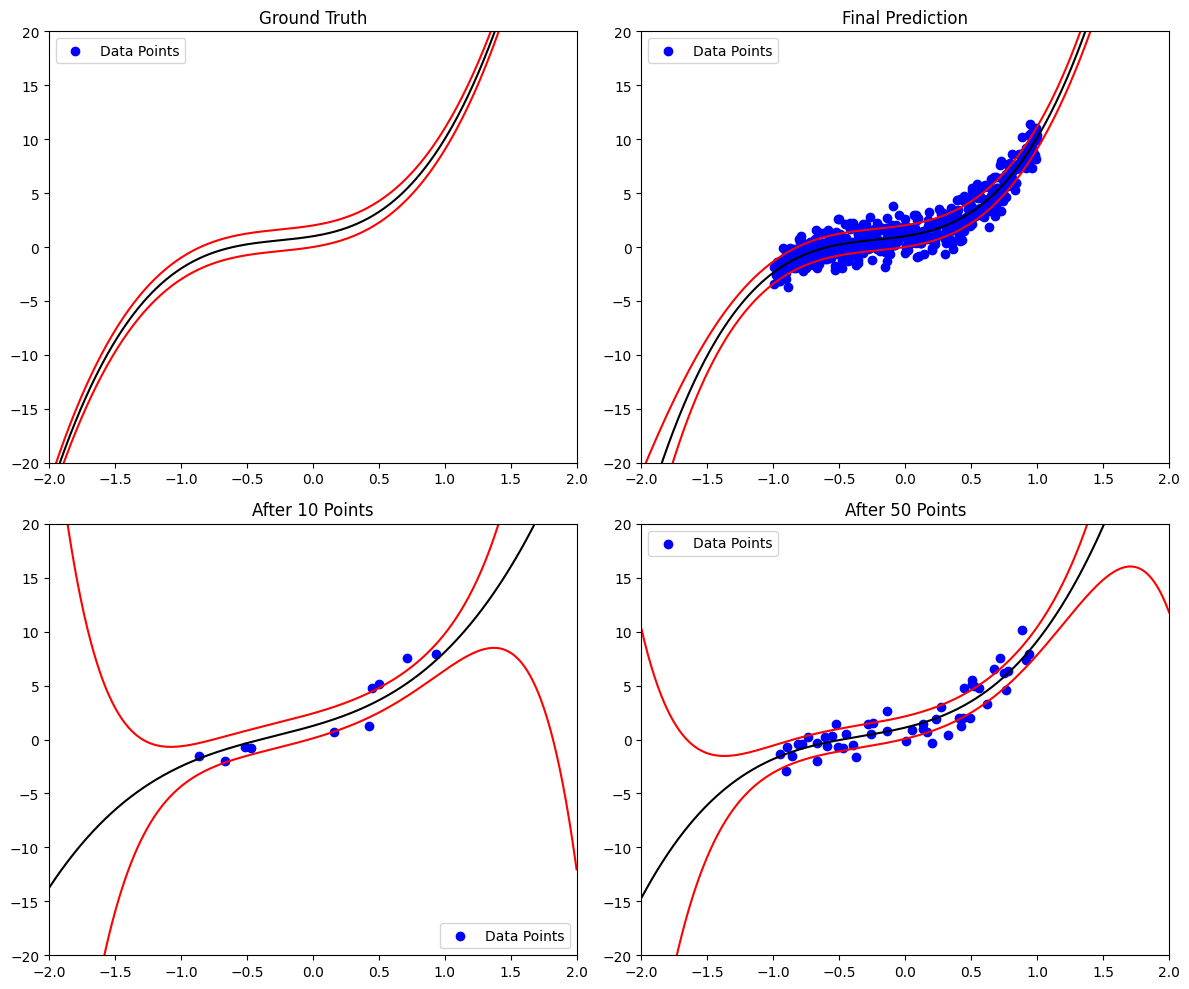

In [5]:
blr = BayesianLinearRegression(b=1, n=4, a=1, w=[1, 2, 3, 4])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)

## 2. b=100,n=4,a=1,w=[1,2,3,4]

Add data point (-0.9155127400651624, -2.159303762690304):

Postirior mean:
 [[-0.02093779]
 [ 0.01916881]
 [-0.01754929]
 [ 0.0160666 ]]
Posterior variance:
 [[ 9.90303454e-03  8.87731133e-05 -8.12729162e-05  7.44063902e-05]
 [ 8.87731133e-05  9.91872708e-03  7.44063902e-05 -6.81199982e-05]
 [-8.12729162e-05  7.44063902e-05  9.93188000e-03  6.23647262e-05]
 [ 7.44063902e-05 -6.81199982e-05  6.23647262e-05  9.94290430e-03]]
Predictive distribution ~ N(-0.06552, 1.03035)
Add data point (0.703238591693282, 4.3242971945228295):

Postirior mean:
 [[0.02141221]
 [0.04928751]
 [0.00332322]
 [0.03102704]]
Posterior variance:
 [[ 9.80581516e-03  1.96321081e-05 -1.29188226e-04  4.00629409e-05]
 [ 1.96321081e-05  9.86955501e-03  4.03297198e-05 -9.25445591e-05]
 [-1.29188226e-04  4.03297198e-05  9.90826458e-03  4.54382959e-05]
 [ 4.00629409e-05 -9.25445591e-05  4.54382959e-05  9.93077223e-03]]
Predictive distribution ~ N(0.06851, 1.01824)
Add data point (0.861925766582077, 7.046588608718302):

Pos

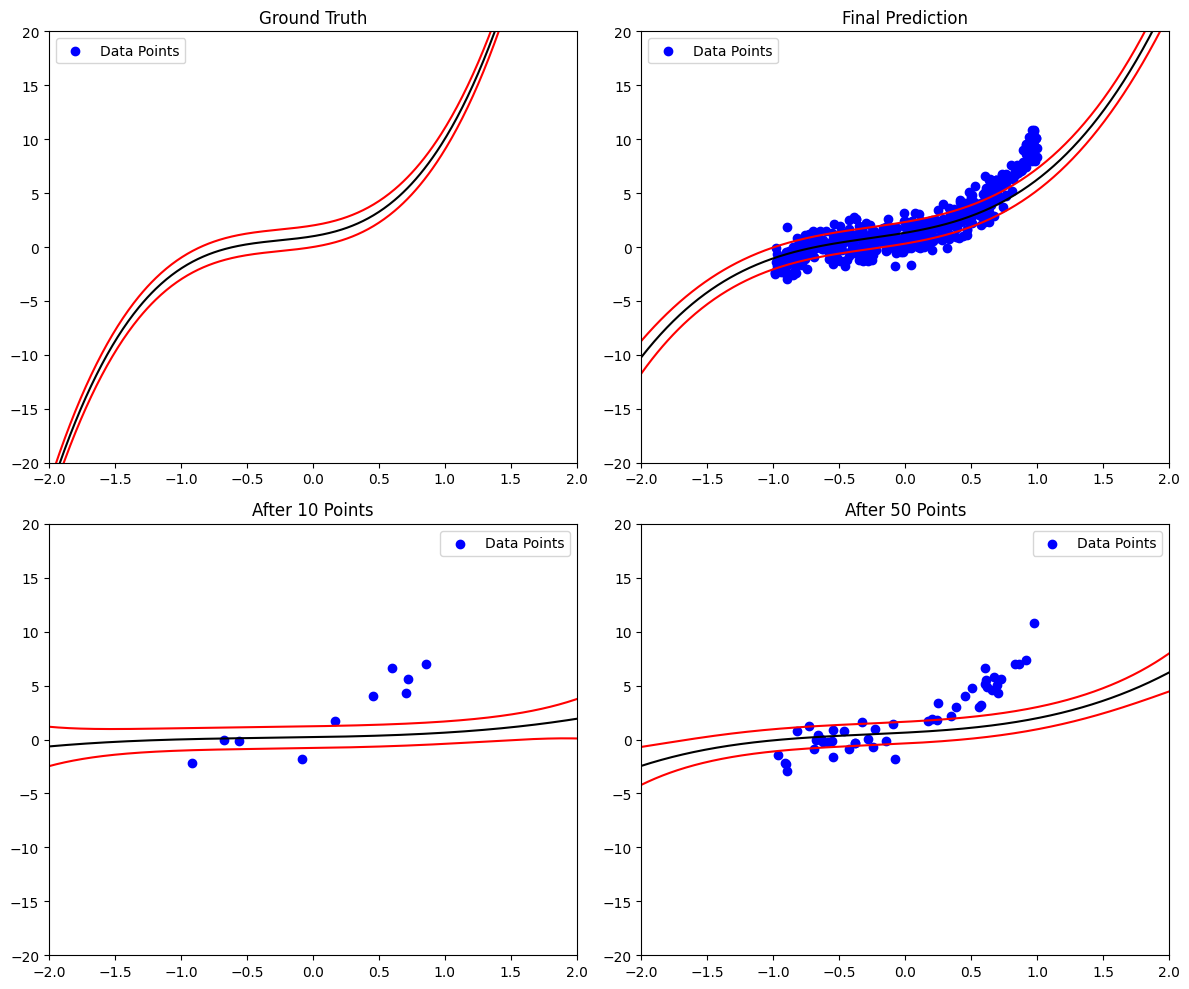

In [6]:
blr = BayesianLinearRegression(b=100,n=4,a=1,w=[1,2,3,4])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)

## 3. b=1,n=3,a=3,w=[1,2,3]

Add data point (-0.5140087283686776, -1.9593005292115167):

Postirior mean:
 [[-0.45207576]
 [ 0.23237089]
 [-0.11944066]]
Posterior variance:
 [[ 0.76926676  0.1185989  -0.06096087]
 [ 0.1185989   0.93903913  0.03133442]
 [-0.06096087  0.03133442  0.98389384]]
Predictive distribution ~ N(-0.60307, 3.92340)
Add data point (-0.8562511150807381, 1.6280430519149833):

Postirior mean:
 [[-0.13530927]
 [-0.10445806]
 [ 0.20268707]]
Posterior variance:
 [[ 0.68587804  0.20726906 -0.14576094]
 [ 0.20726906  0.84475303  0.12150531]
 [-0.14576094  0.12150531  0.89765853]]
Predictive distribution ~ N(0.10274, 4.06650)
Add data point (0.42260253582992524, 1.6580556249869831):

Postirior mean:
 [[0.20070857]
 [0.15896732]
 [0.23231435]]
Posterior variance:
 [[ 0.54645028  0.09796293 -0.15805453]
 [ 0.09796293  0.75906113  0.1118676 ]
 [-0.15805453  0.1118676   0.89657459]]
Predictive distribution ~ N(0.30938, 3.75384)
Add data point (0.2547486459754731, 1.374432249882211):

Postirior mean:
 [[0.37

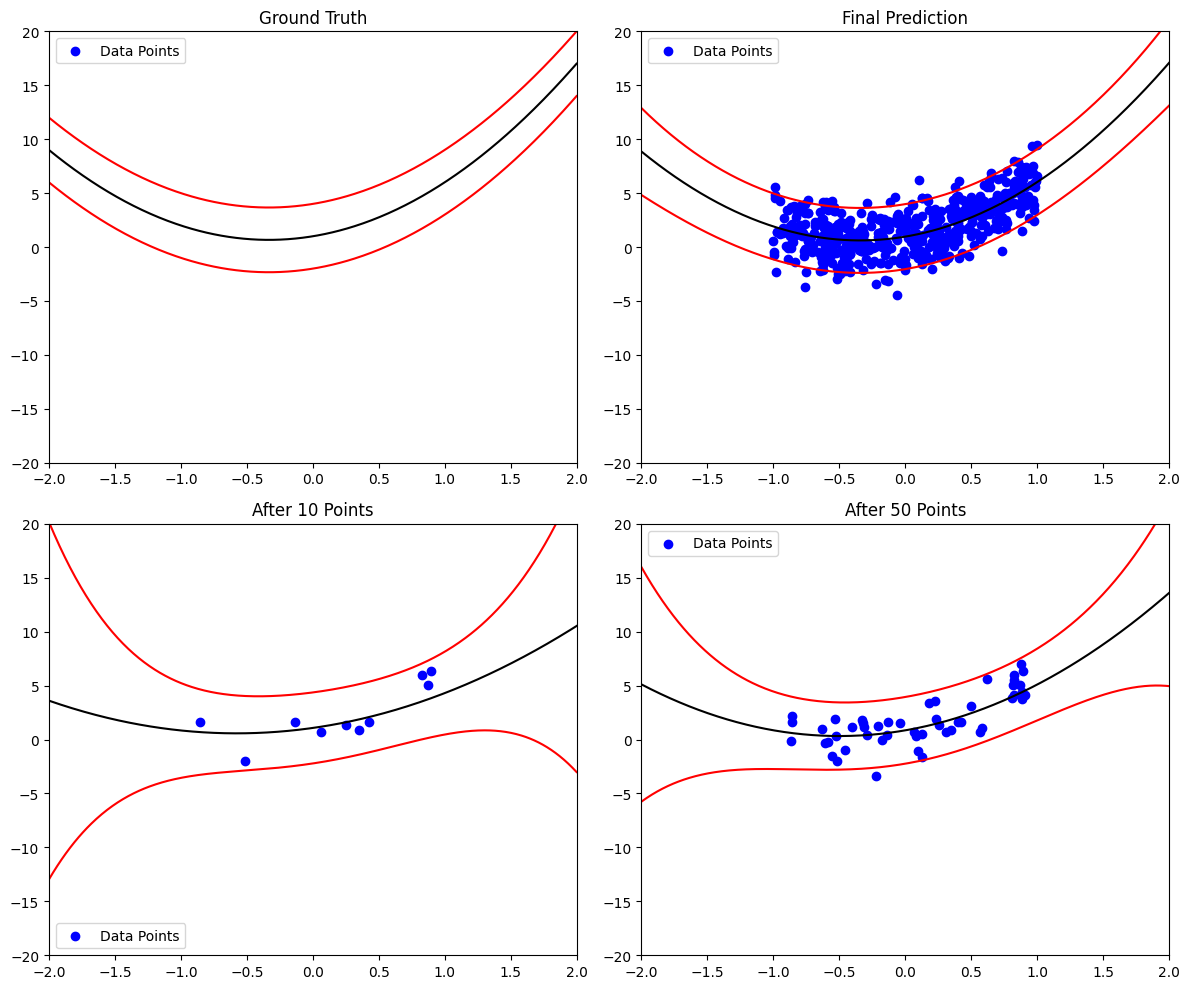

In [7]:
blr = BayesianLinearRegression(b=1,n=3,a=3,w=[1,2,3])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)